In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vivarium import InteractiveContext

In [2]:
sim = InteractiveContext("../src/village_simulator/simulation/specification.yaml")

In [3]:
p_0 = sim.get_population()
p_0

,tracked,x,y,terrain,rainfall_mid_growth,rainfall_late_growth,cumulative_dry_days,previous_day_dry,temperature,rainfall,is_village,arable_land,female_population_size,male_population_size,wheat_stores,wheat_projected_yield,wood_stores,stone_stores,bronze_stores
0,True,0,0,mountain,0.0,0.0,0.0,False,NaN,NaN,True,0.102782,51,51,54.829527,51.537216,739.157973,689.866960,221.218363
1,True,0,1,grassland,0.0,0.0,0.0,False,NaN,NaN,True,0.923784,463,461,504.553152,468.217701,5686.664804,4000.182673,2960.501189
2,True,0,2,grassland,0.0,0.0,0.0,False,NaN,NaN,True,0.923332,459,464,380.726987,457.312508,6467.913487,3415.358464,2813.293339
3,True,0,3,grassland,0.0,0.0,0.0,False,NaN,NaN,True,0.732768,372,360,504.262607,364.071805,5291.776249,3518.677276,2050.415162
4,True,0,4,forest,0.0,0.0,0.0,False,NaN,NaN,False,0.397170,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
5,True,1,0,grassland,0.0,0.0,0.0,False,NaN,NaN,True,0.786373,399,389,391.146280,413.646067,6897.368252,3114.420394,2611.232752
6,True,1,1,mountain,0.0,0.0,0.0,False,NaN,NaN,False,0.114879,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,True,1,2,forest,0.0,0.0,0.0,False,NaN,NaN,False,0.638393,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,True,1,3,forest,0.0,0.0,0.0,False,NaN,NaN,False,0.556283,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,True,1,4,forest,0.0,0.0,0.0,False,NaN,NaN,True,0.230069,115,115,105.526773,115.820470,1339.683193,903.579589,764.270717


In [4]:
%%time
data = []
for _ in range(400):
    sim.step()
    temperature = sim.get_population()
    dates = pd.Series(sim._clock.time, name="date", index=temperature.index)
    data.append(pd.concat([dates, temperature], axis=1))

data = pd.concat(data)

CPU times: user 2min 44s, sys: 303 ms, total: 2min 44s
Wall time: 2min 44s


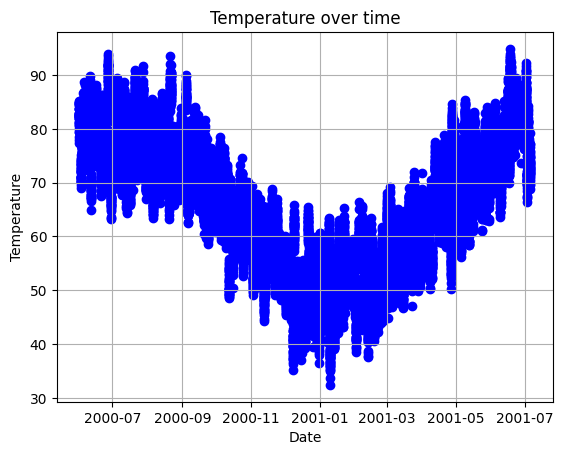

In [5]:
import matplotlib.pyplot as plt

# Sample data
x = data["date"]
y = data["temperature"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over time')

# Show the plot
plt.grid(True)
plt.show()

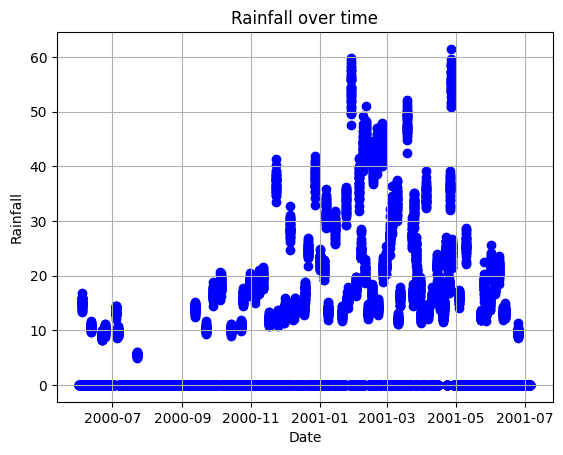

In [6]:
# Sample data
x = data["date"]
y = data["rainfall"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')

# Show the plot
plt.grid(True)
plt.show()

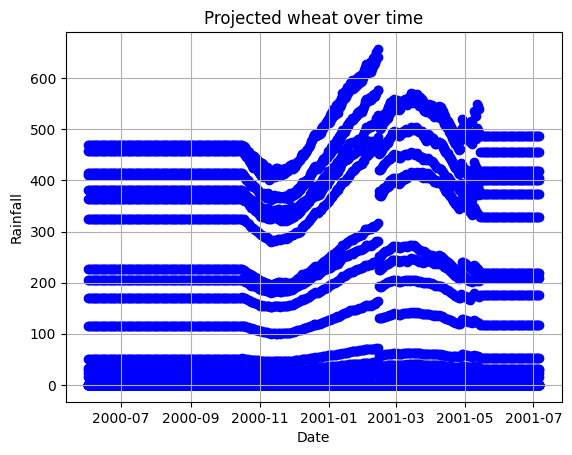

In [7]:
# Sample data
x = data["date"]
y = data["wheat_projected_yield"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Projected wheat over time')

# Show the plot
plt.grid(True)
plt.show()

In [8]:
data["rainfall"].mean()

5.143200289295755

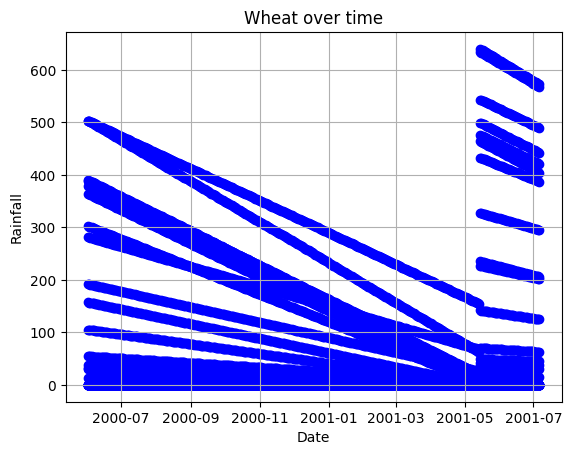

In [9]:
# Sample data
x = data["date"]
y = data["wheat_stores"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Wheat over time')

# Show the plot
plt.grid(True)
plt.show()

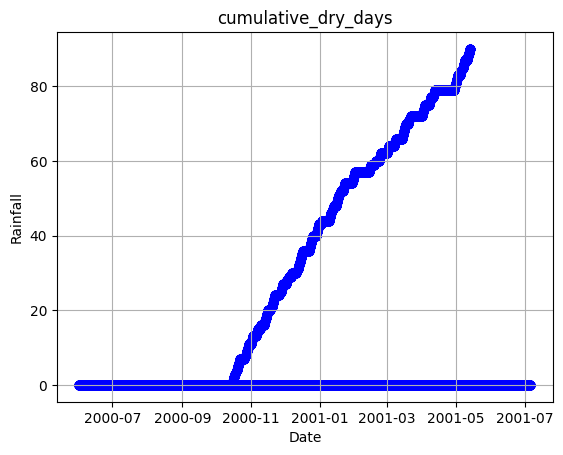

In [10]:
# Sample data
x = data["date"]
y = data["cumulative_dry_days"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('cumulative_dry_days')

# Show the plot
plt.grid(True)
plt.show()

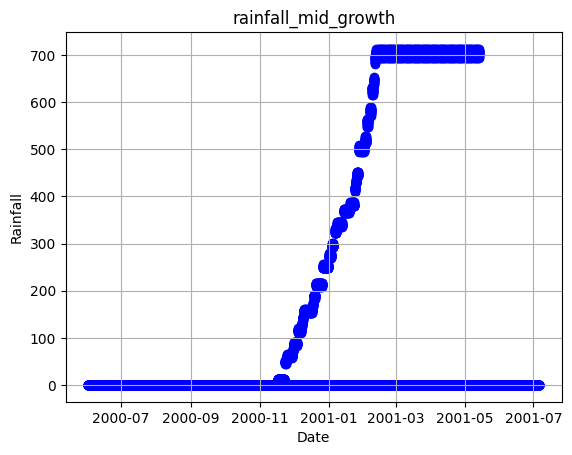

In [11]:
# Sample data
x = data["date"]
y = data["rainfall_mid_growth"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_mid_growth')

# Show the plot
plt.grid(True)
plt.show()

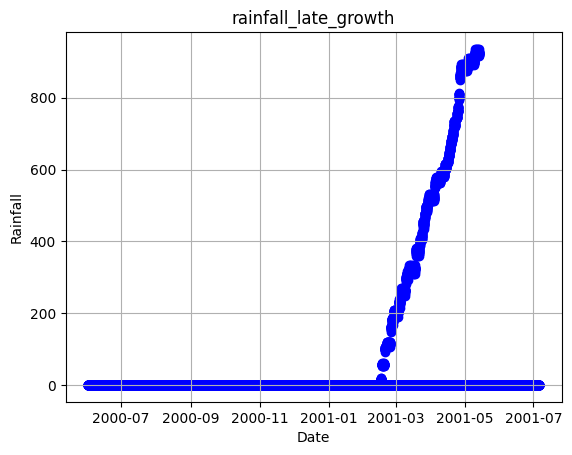

In [12]:
# Sample data
x = data["date"]
y = data["rainfall_late_growth"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_late_growth')

# Show the plot
plt.grid(True)
plt.show()

In [13]:
df = pd.DataFrame({"a": [4, 2, 3], 'b': [6, 2, 3]})
df

,a,b
0,4,6
1,2,2
2,3,3
